# Titanic: Machine Learning from Disaster

## 1. Introduction

The sinking of the Titanic in 1912 after she struck an iceberg during her maiden voyage from Southampton to New York City has become one of the greatest tragedies of maritime history. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died. In this project I will analyse passenger data and develop a predictive model that answers the question: “Who was more likely to survive?”

## 2. Import libraries and data

In [2]:
# Import libraries necessary for this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, log_loss, mean_squared_error, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

import scipy.stats as st

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

In [ ]:
!pip install catboost

In [ ]:
from google.colab import files
uploaded = files.upload()

In [4]:
# load the training and test datasets
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv") 

In [0]:
# Check first and last 5 rows of training dataframe and number of rows and columns
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Data Dictionary

- PassengerID - A column added by Kaggle to identify each row and make submissions easier
- Survived - Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass - The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex - The passenger’s sex
- Age - The passenger’s age in years
- SibSp - The number of siblings or spouses the passenger had aboard the Titanic
- Parch - The number of parents or children the passenger had aboard the Titanic
- Ticket - The passenger’s ticket number
- Fare - The fare the passenger paid (British pounds)
- Cabin - The passenger’s cabin number
- Embarked - The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [5]:
# Check first and last 5 rows of test dataframe and number of rows and columns
test_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
358,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
359,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
360,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
361,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## 3. Exploratory Data Analysis

In [0]:
# Concise summary of the training dataframe to show missing values and data types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
# Concise summary of the test dataframe
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 12 columns):
PassengerId    363 non-null int64
Survived       363 non-null int64
Pclass         363 non-null int64
Name           363 non-null object
Sex            363 non-null object
Age            283 non-null float64
SibSp          363 non-null int64
Parch          363 non-null int64
Ticket         363 non-null object
Fare           362 non-null float64
Cabin          68 non-null object
Embarked       363 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 34.2+ KB


### 3.1 Missing values

We can see that there are missing values for the __Age__ and __Cabin__ attributes in both datasets, __Embarked__ in the training set and __Fare__ in the test set.


In [0]:
# Show the numbers of missing values in the training data
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
# Calculate percentage of missing data in training set
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]

    return ms

missingdata(train_data)


,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


There are 177 rows with missing Age, 687 rows with missing Cabin and 2 rows with missing Embarked information.

In [0]:
# Show the numbers of missing values in the test data
test_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             80
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          295
Embarked         0
dtype: int64

In [0]:
# Calculate percentage of missing data in test set
def missingdata(data):    
    total = data.isnull().sum().sort_values(ascending = False)    
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)    
    ms = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])    
    ms = ms[ms["Percent"] > 0]    
  
    return ms

missingdata(test_data)

,Total,Percent
Cabin,295,81.267218
Age,80,22.038567
Fare,1,0.275482




There are 80 rows with missing Age, 1 row with missing Fare and 295 rows with missing Cabin information in the test set.

### 3.2 Different types of variables present in the datasets

There are four types of variables:
- Numerical Features: Age, Fare, SibSp and Parch
- Categorical Features: Sex, Embarked, Survived and Pclass 
- Alphanumeric Features: Ticket and Cabin (contain both alphabetical and numerical values)
- Text Features: Name

In [0]:
# Descriptive statistics for numerical data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200




We can observe that:
- Only 38% Survived. 
- The mean Fare was £32.20
- The mean Age was less than 30 years old.

In [0]:
# Descriptive statistics for categorical data types.

train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Leitch, Miss. Jessie Wills",male,347082,G6,S
freq,1,577,7,4,644


In [0]:
train_data.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
E101           3
              ..
B37            1
B80            1
A32            1
A24            1
B102           1
Name: Cabin, Length: 147, dtype: int64

In [0]:
train_data.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
CA 2144     6
347088      6
           ..
12460       1
13049       1
19947       1
343275      1
341826      1
Name: Ticket, Length: 681, dtype: int64

From the above training data statistics we can observe that:

- There are duplicate Ticket numbers and shared Cabins. 
    - The highest number of repetitions for a Ticket number is 7 e.g. for "CA. 2343". 
    - Similarly, the highest number of people sharing the same cabins is 4 for Cabin numbers "C23 C25 C27".
    
   

- We also see that 644 people embarked at port "S", Southampton.


- Of the 891 rows, 577 were Male and the rest were Female.

### Barchart of Titanic survivors

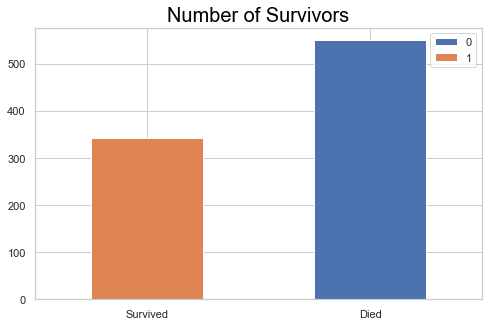

In [0]:
sns.set(style="whitegrid")
def bar_chart(feature):
    survived = train_data[train_data['Survived']==1][feature].value_counts()
    died = train_data[train_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,died])
    df.index = ['Survived','Died']
    df.plot(kind='bar',stacked=True, figsize=(8,5))
    plt.xticks(rotation=0)
    
bar_chart('Survived')
plt.title('Number of Survivors', color = 'black', fontsize = 20);


In the training set, more people died than survived.


### Pie chart of survival percentage

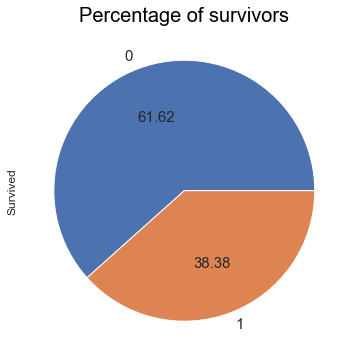

In [0]:
train_data["Survived"].value_counts().plot.pie(figsize=(6, 6),
                                          autopct='%.2f',
                                          fontsize = 15)
plt.title('Percentage of survivors', color = 'black', fontsize = 20);

### 3.3 Relationship between Features and Survival

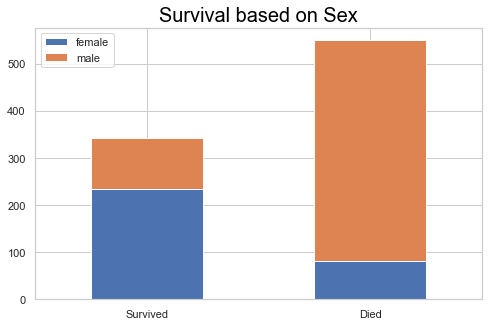

In [0]:
sns.set(style="whitegrid")
bar_chart('Sex')
plt.xticks(rotation=0)
plt.title('Survival based on Sex', color = 'black', fontsize = 20);


Women were more likely to survive than men.

In [0]:
# How many women and how many men survived.
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).sum()

,Sex,Survived
0,female,233
1,male,109


In [0]:
# Proportion of women that survived, along with the proportion of men.
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908



74% of women survived, while 19% of men survived.

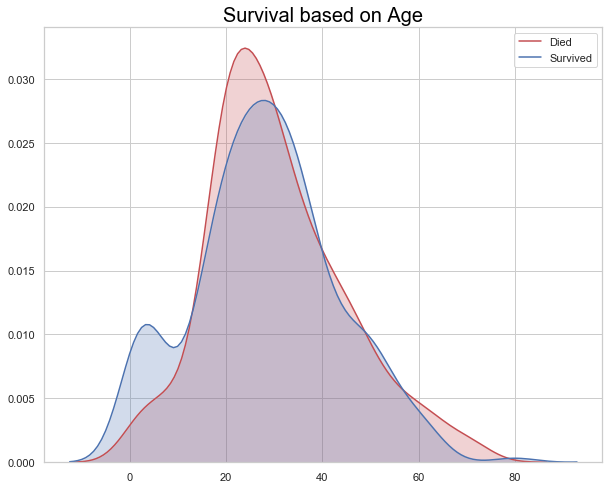

In [0]:
fig,axs=plt.subplots(figsize=(10,8))
sns.set_style(style='whitegrid')
sns.kdeplot(train_data.loc[(train_data['Survived']==0),'Age'],color='r',shade=True,label='Died')
sns.kdeplot(train_data.loc[(train_data['Survived']==1),'Age'],color='b',shade=True,label='Survived')
plt.title('Survival based on Age', color = 'black', fontsize = 20);

The left part of the distribution shows that children and infants were the priority.

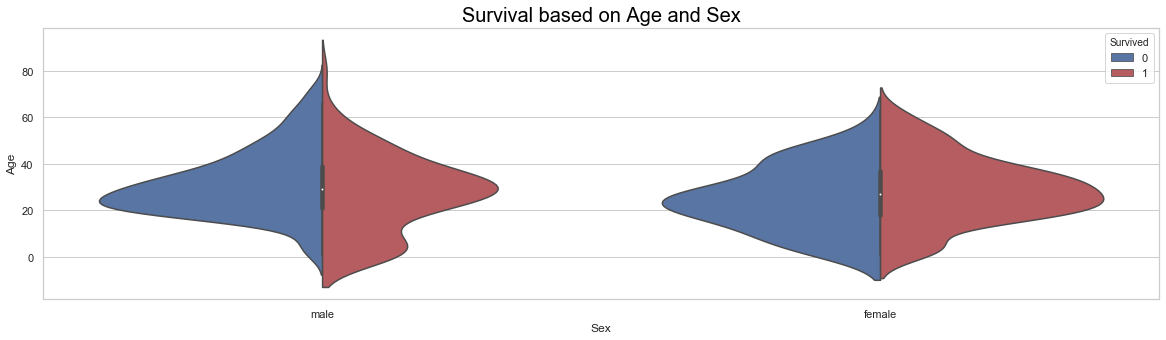

In [0]:
# Violinplot for Survival vs Age and Sex
fig = plt.figure(figsize=(20, 5))
sns.violinplot(x='Sex', y='Age', 
               hue='Survived', data=train_data, 
               split=True,
               palette={0: "b", 1: "r"}
              )
plt.title('Survival based on Age and Sex', color = 'black', fontsize = 20);

Age affects the survival for male passengers:

- Younger males tend to survive
- A large number of passengers between 20 and 40 died

Age does not appear to have a direct impact on female survival.

These violin plots confirm the code of conduct followed in a life-threatening situation, "Women and children first", most famously associated with the sinking of the Titanic.
 

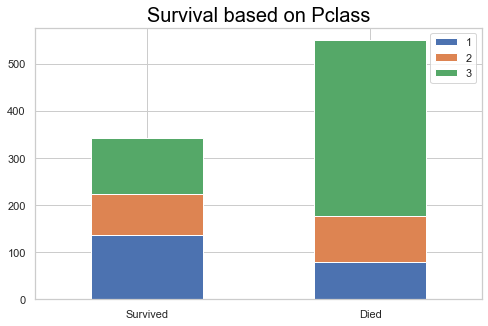

In [0]:

# Pclass vs Survival
sns.set(style="whitegrid")
bar_chart('Pclass')
plt.xticks(rotation=0)
plt.title('Survival based on Pclass', color = 'black', fontsize = 20);

Ticket class was a proxy for socio-economic status and 1st class passengers were more likely to survive than other classes while 3rd class passengers were least likely to survive given the position of their cabins.

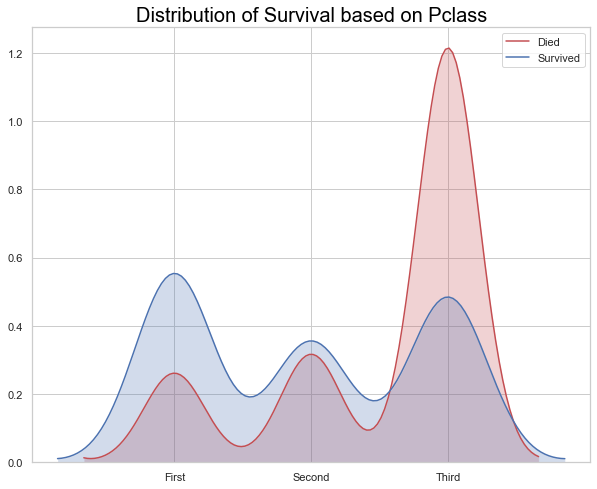

In [0]:
plt.subplots(figsize=(10,8))
sns.kdeplot(train_data.loc[(train_data['Survived'] == 0),'Pclass'],shade=True,color='r',label='Died')
ax=sns.kdeplot(train_data.loc[(train_data['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived' )

labels = ['First', 'Second', 'Third']
plt.xticks(sorted(train_data.Pclass.unique()),labels)
plt.title('Distribution of Survival based on Pclass', color = 'black', fontsize = 20);



The kde plot appears to show that third class passengers have survived more than second class passengers. This is because there were a lot more third class passengers than first and second.

### Survival infographic

![Survival infographic](images/survival-infographic.jpg)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


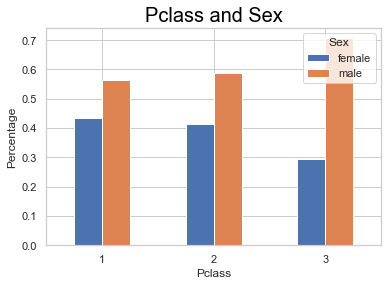

In [0]:
# Table and bar chart showing Pclass vs Sex
tab = pd.crosstab(train_data['Pclass'], train_data['Sex'])
print (tab)


tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False)
plt.xticks(rotation=0)
plt.xlabel('Pclass')
plt.ylabel('Percentage')
plt.title('Pclass and Sex', color = 'black', fontsize = 20);

There are more males among the 3rd class passengers.

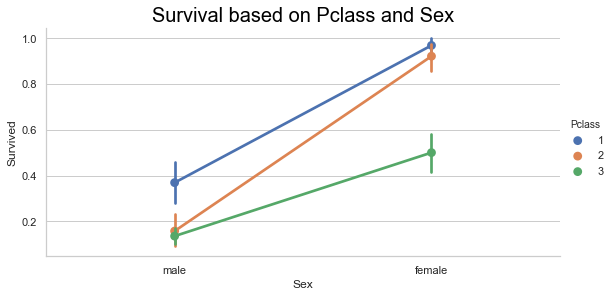

In [0]:

sns.factorplot('Sex', 'Survived', hue='Pclass', height=4, aspect=2, data=train_data)
plt.title('Survival based on Pclass and Sex', color = 'black', fontsize = 20);                   

- Women from 1st and 2nd class have an almost 100% chance of survival.
- Men from 2nd and 3rd class have only around 10% chance of survival.

### Survival based on Pclass, Sex and port of Embarkation

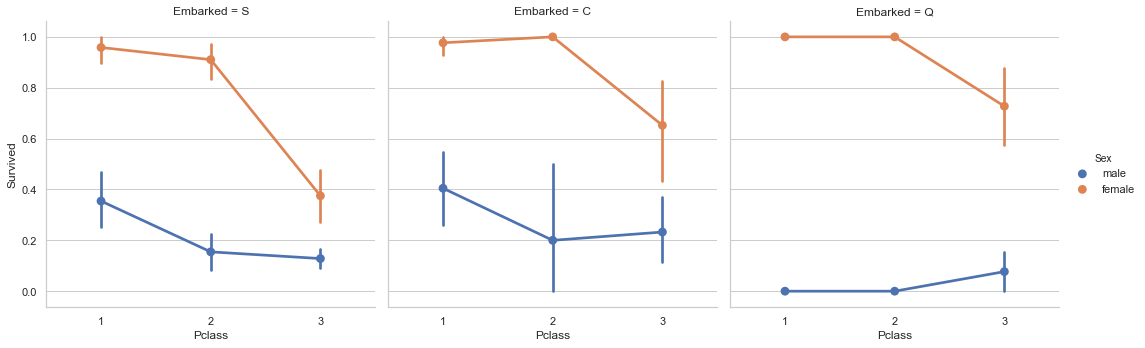

In [0]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train_data);

Almost all females from 1st and 2nd survived.
Females who did not survive were mostly from 3rd class.
Males from 1st only have a slightly higher chance of survival than 2nd and 3rd class.

In [0]:
# Number who embarked at each port
train_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
# Number of survivors who embarked at each port
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Passengers embarking at port C (Cherbourg) had the greatest change of survival.

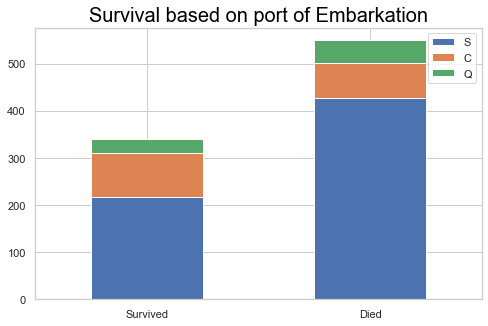

In [0]:
# Survival vs Embarkation
sns.set(style="whitegrid")
bar_chart('Embarked')
plt.xticks(rotation=0)
plt.title('Survival based on port of Embarkation', color = 'black', fontsize = 20);

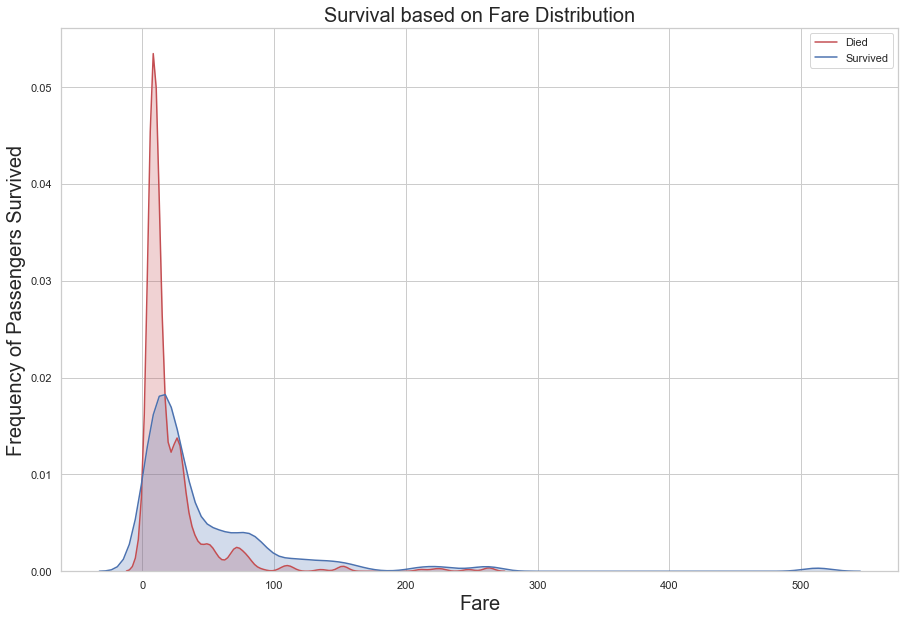

In [0]:
# Survival vs  Fare
plt.subplots(figsize=(15,10))

ax=sns.kdeplot(train_data.loc[(train_data['Survived'] == 0),'Fare'],color='r',shade=True,label='Died')
ax=sns.kdeplot(train_data.loc[(train_data['Survived'] == 1),'Fare'],color='b',shade=True,label='Survived' )
plt.title('Survival based on Fare Distribution',fontsize=20)
plt.ylabel('Frequency of Passengers Survived',fontsize=20)
plt.xlabel('Fare',fontsize=20);

It is noticeable that fare and survival are inversely proportional.

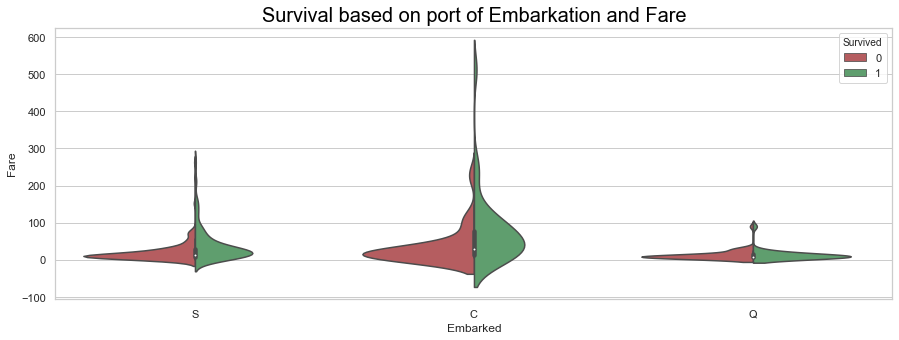

In [0]:
# Survival vs Embarkation and Fare
fig = plt.figure(figsize=(15, 5))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=train_data, split=True, palette={0: "r", 1: "g"})
plt.title('Survival based on port of Embarkation and Fare', color = 'black', fontsize = 20);

It seems that the embarkation port C (Cherbourg) had a wider range of ticket fares and therefore the passengers who paid the highest prices are those who survive.

We also see this happening for embarkation port S (Southampton) and less for Q (Queenstown).

In [0]:
# SibSp value counts
train_data.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [0]:
# SibSp vs Survival
train_data.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

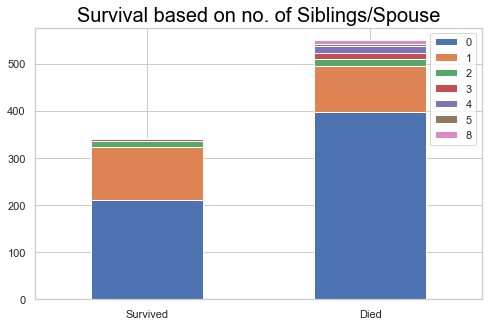

In [0]:
sns.set(style="whitegrid")
bar_chart('SibSp')
plt.xticks(rotation=0)
plt.title('Survival based on no. of Siblings/Spouse', color = 'black', fontsize = 20);

Passengers with siblings or a spouse were more likely to survive than those travelling alone.

In [0]:
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


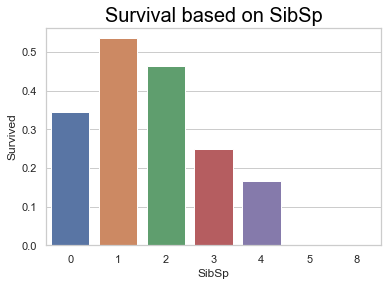

In [0]:
sns.barplot(x='SibSp', y='Survived', ci=None, data=train_data)
plt.title('Survival based on SibSp', color = 'black', fontsize = 20);

It appears that the best chance of survival was for passengers with one sibling and/or spouse.

In [0]:
# Parch value counts
train_data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [0]:
# Parch vs Survival
train_data.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

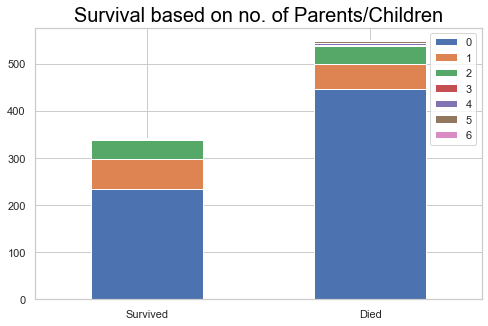

In [0]:
sns.set(style="whitegrid")
bar_chart('Parch')
plt.xticks(rotation=0)
plt.title('Survival based on no. of Parents/Children', color = 'black', fontsize = 20);

In [0]:
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


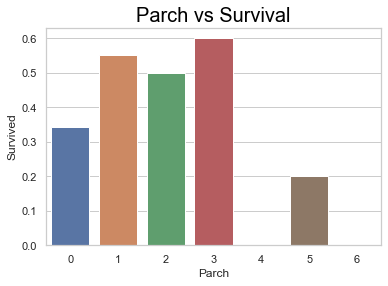

In [0]:
sns.barplot(x='Parch', y='Survived', ci=None, data=train_data)
plt.title('Parch vs Survival', color = 'black', fontsize = 20);

The best chance of survival was for those who had three parents/children.

### Violinplots showing Age vs Embarked, Pclass and Sex

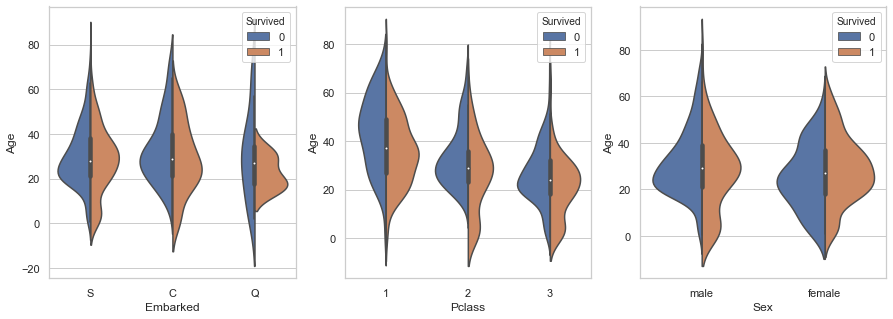

In [0]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train_data, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train_data, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train_data, split=True, ax=ax3);

From the Embarked violinplot, we can see that:

- Of the passengers who embarked at Q children had a greater chance of survival.

From the Pclass violinplot, we can see that:

- 1st class has very few children compared to the other two classes.
- 1st class has more older people compared to other two classes.
- Almost all children (age 0 to 10) from 2nd class survived.
- Most children in 3rd class survived.
- More younger people from 1st class survived compared to older people.

From Sex violinplot, we can see that:

- Most male children (between age 0 to 14) survived.
- Females aged between 18 to 40 had a better chance of survival.

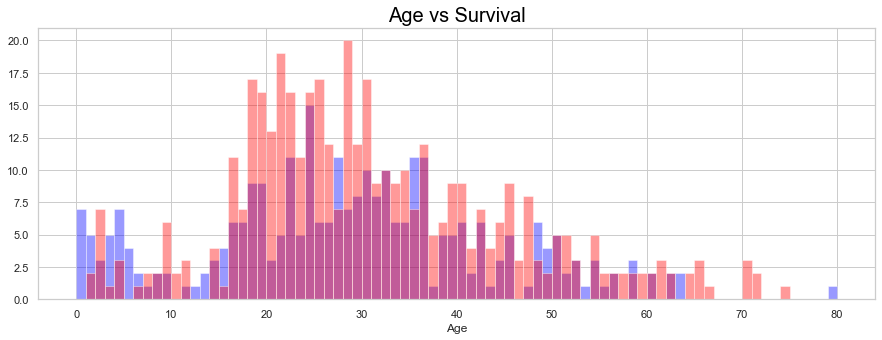

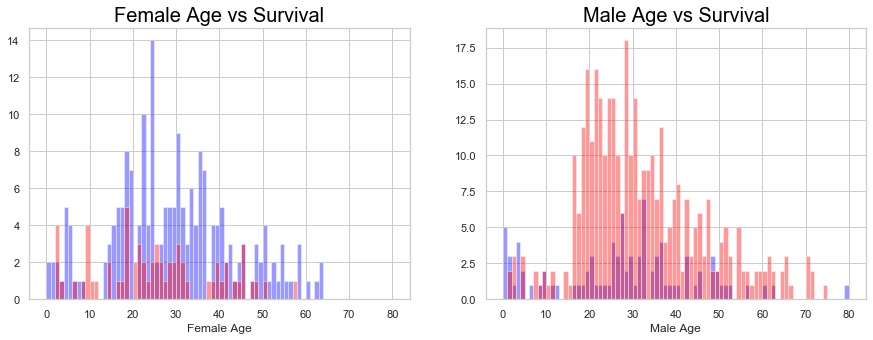

In [0]:
# Survival vs Age and Sex

total_survived = train_data[train_data['Survived']==1]
total_not_survived = train_data[train_data['Survived']==0]
male_survived = train_data[(train_data['Survived']==1) & (train_data['Sex']=="male")]
female_survived = train_data[(train_data['Survived']==1) & (train_data['Sex']=="female")]
male_not_survived = train_data[(train_data['Survived']==0) & (train_data['Sex']=="male")]
female_not_survived = train_data[(train_data['Survived']==0) & (train_data['Sex']=="female")]

plt.figure(figsize=[15,5])
plt.subplot(111)
sns.distplot(total_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(total_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Age')
plt.title('Age vs Survival', color = 'black', fontsize = 20);

plt.figure(figsize=[15,5])

plt.subplot(121)
sns.distplot(female_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(female_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Female Age')
plt.title('Female Age vs Survival', color = 'black', fontsize = 20);

plt.subplot(122)
sns.distplot(male_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(male_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Male Age')
plt.title('Male Age vs Survival', color = 'black', fontsize = 20);

From the above figures, we can see that:

- Combining both male and female, we can see that children with age between 0 to 5 have better chance of survival.
- Females with age between "18 to 40" and "50 and above" have higher chance of survival.
- Males with age between 0 to 14 have better chance of survival.

## 4. Feature Engineering

In this section:

- Missing data will be addressed
- I will do some data wrangling to process and transform the data for variables to be machine readable.
- I will create, or "engineer", additional features that will be useful in building the model.

### Combine train and test data


New features will be engineering using the train set to prevent information leakage, before adding these variables to the test set.

In [0]:
# combining training and test datasets
train_test_data = [train_data, test_data]

### 4.1 Sex 

In [0]:
# Feature scaling to map the string values male and female to machine readable 1/0 values respectively.
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

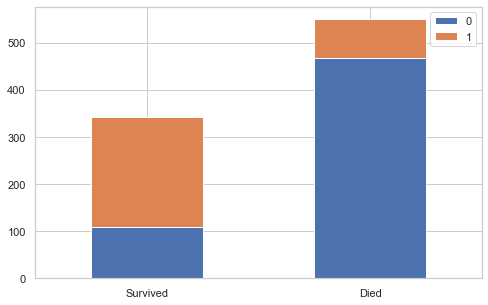

In [0]:
# mapping now male: 0 female: 1
bar_chart('Sex')

### 4.2 Title

In [0]:
# Extracting titles from names will give additional information about social status.
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [0]:
# Titles in training data
train_data['Title'].value_counts() 

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Jonkheer      1
Capt          1
Countess      1
Lady          1
Don           1
Mme           1
Ms            1
Sir           1
Name: Title, dtype: int64

In [0]:
# Titles in test data
test_data['Title'].value_counts() 

Mr        218
Miss       65
Mrs        58
Master     15
Rev         2
Col         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

__Title map__

Mr: 0<br>
  Mrs: 1<br>
  Miss: 2<br>
  Master: 3<br>
  Professional: 4<br>
  Nobility: 5

In [0]:
title_mapping = {"Mr": 0, "Mrs": 1, "Miss": 2, 
                 "Master": 3, "Dr": 4, "Rev": 4, "Col": 4, "Major": 4, "Mlle": 2,"Countess": 5,
                 "Ms": 1, "Lady": 5, "Jonkheer": 5, "Don": 5, "Dona" : 5, "Mme": 1,"Capt": 4,"Sir": 5 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [0]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0


In [0]:
test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,1
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,1


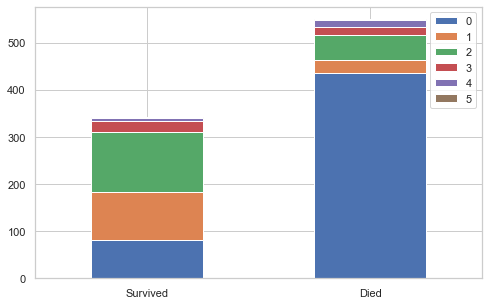

In [0]:
bar_chart('Title')

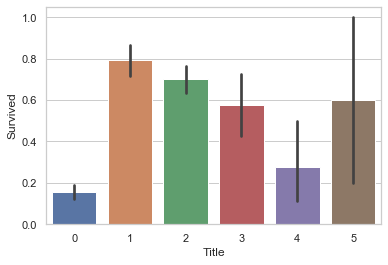

In [0]:
sns.barplot(x="Title", y="Survived", data=train_data);

In [0]:
# Delete unnecessary Name feature from dataset
train_data.drop('Name', axis=1, inplace=True)
test_data.drop('Name', axis=1, inplace=True)

In [0]:
# Check Name has gone from training set
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [0]:
# Check Name has gone from test set
test_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,0,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,1,3,1,47.0,1,0,363272,7.0000,NaN,S,1
2,894,0,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,0,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,1,3,1,22.0,1,1,3101298,12.2875,NaN,S,1


### 4.3 Age

#### 4.3.1 Missing Age values

We have seen that the Age variable in the training set was missing 177 values. This is a large number ( ~ 13% of the dataset). Simply replacing them with the mean or the median age might not be the best solution since the age may differ by groups and categories of passengers.

We will use Title's median age for missing Age.

In [0]:
# Fill missing age with median age for each title (Mr, Mrs, Miss, Master, Professional, Nobility)
train_data["Age"].fillna(train_data.groupby("Title")["Age"].transform("median"), inplace=True)
test_data["Age"].fillna(test_data.groupby("Title")["Age"].transform("median"), inplace=True)

In [0]:
# Check no missing Age values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [0]:
train_data.head(10)
train_data.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886    50.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

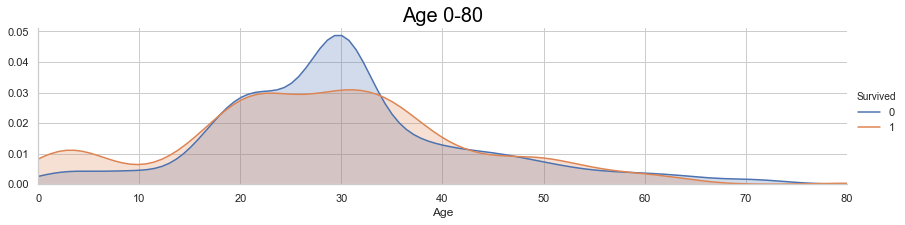

In [0]:
# Plot distribution of age and survival for full age range
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()
plt.title('Age 0-80', color = 'black', fontsize = 20);

We can see that up to age 16 there is a high chance of survival, from mid-20s to mid-30s a high chance of dying, from late 40s to late 50s a higher chance of survival, and then a low chance of survival for elderly passengers.

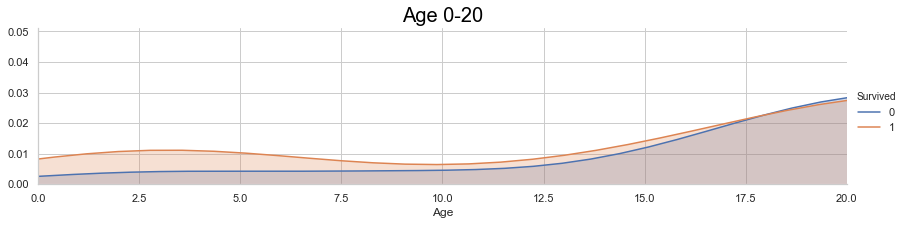

In [0]:
# Plot distribution of age and survival from 0-20
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)
plt.title('Age 0-20', color = 'black', fontsize = 20);

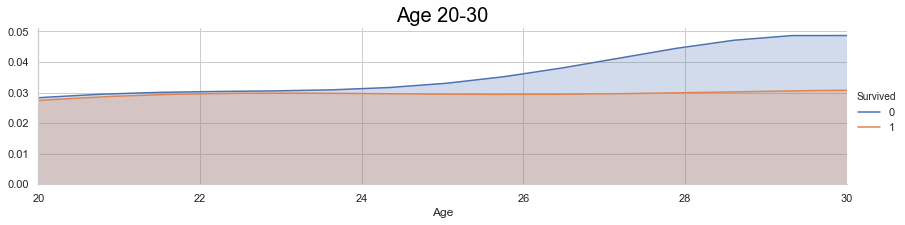

In [0]:
# Plot distribution of age and survival from 20-30
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)
plt.title('Age 20-30', color = 'black', fontsize = 20);

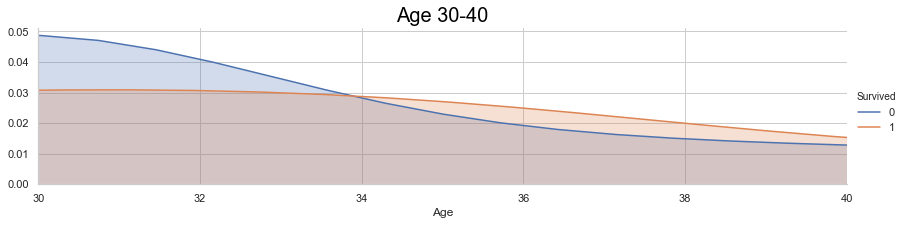

In [0]:
# Plot distribution of age and survival from 30-40
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)
plt.title('Age 30-40', color = 'black', fontsize = 20);

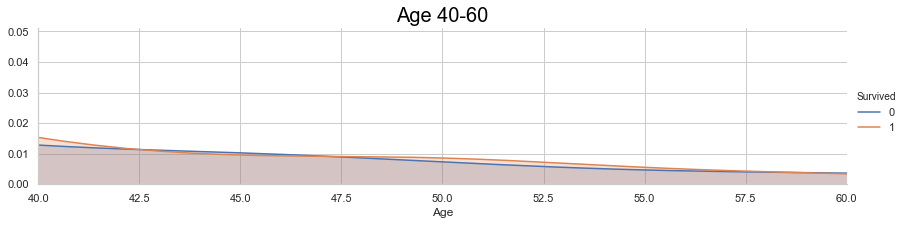

In [0]:
# Plot distribution of age and survival from 40-50
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)
plt.title('Age 40-60', color = 'black', fontsize = 20);

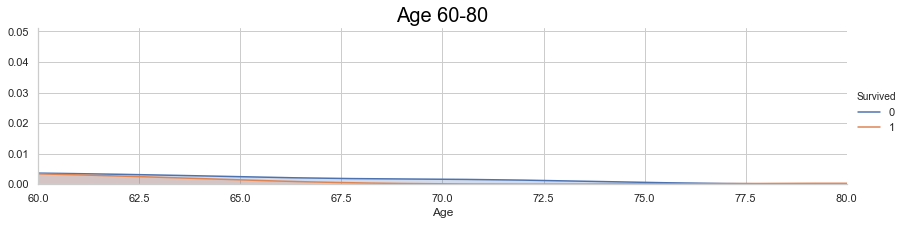

In [0]:
# Plot distribution of age and survival from 60-80
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()
plt.xlim(60, 80)
plt.title('Age 60-80', color = 'black', fontsize = 20);

#### 4.3.2 Binning

Create bin columns grouping data into age bands.

__Feature vector map__

child: 0<br>
youth: 1<br>
adult: 2<br>
mid-age: 3<br>
senior: 4

In [0]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [0]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


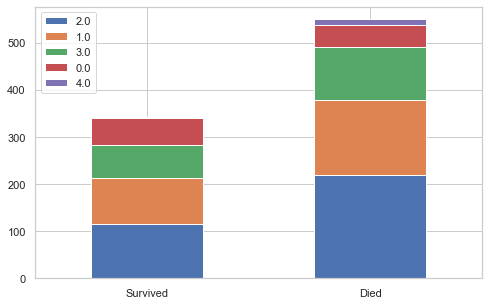

In [0]:
bar_chart('Age')

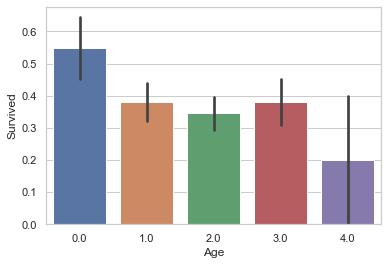

In [0]:
sns.barplot(x="Age", y="Survived", data=train_data);

### 4.4 Embarked

#### 4.4.1 Missing values

There are two missing values in the training set and none in the test set.

In [0]:
# Check statistics for Embarked
print(train_data['Embarked'].value_counts(ascending=True))
print(train_data['Embarked'].value_counts(normalize=True,ascending=True))

Q     77
C    168
S    644
Name: Embarked, dtype: int64
Q    0.086614
C    0.188976
S    0.724409
Name: Embarked, dtype: float64


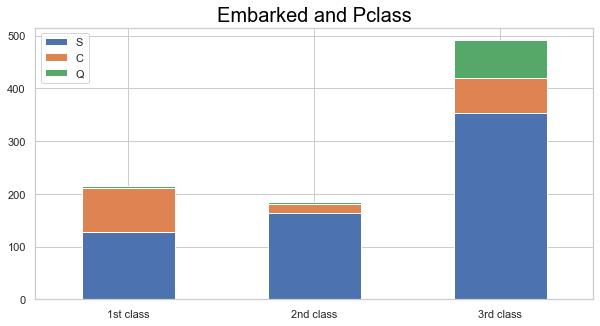

In [0]:
# Barchart of Embarked feature by Pclass
Pclass1 = train_data[train_data['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train_data[train_data['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train_data[train_data['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))
plt.title('Embarked and Pclass', color = 'black', fontsize = 20)
plt.xticks(rotation=0);

The majority of passengers embarked at S (Southampton)  we will replace the two missing values with S and map all values into numbers.

In [0]:
# Replace two missing values with S
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [0]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [0]:
# Map categorical values to numerical values
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [0]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


### 4.5 Fare

#### 4.5.1 Missing Fare values


In [0]:
# Fill missing Fare with median fare for each Pclass
train_data["Fare"].fillna(train_data.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test_data["Fare"].fillna(test_data.groupby("Pclass")["Fare"].transform("median"), inplace=True)

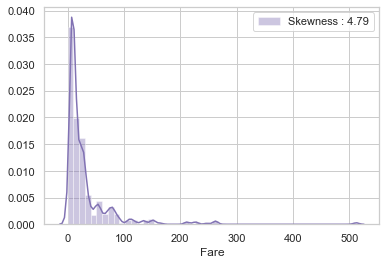

In [0]:
# Plot to show skewness of fare distribution
fare_dist = sns.distplot(train_data["Fare"], color="m", label="Skewness : %.2f"%(train_data["Fare"].skew()))
fare_dist = fare_dist.legend(loc="best");

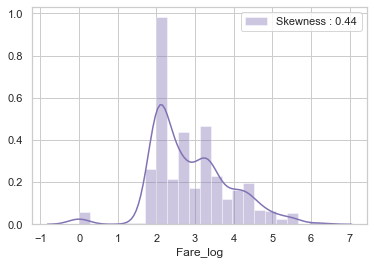

In [0]:
# Logarithm to remove impact of extreme values
train_data["Fare"] = train_data["Fare"].fillna(train_data["Fare"].median())
train_data['Fare_log'] = train_data["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
 
fare_log_dist = sns.distplot(train_data["Fare_log"], color="m", label="Skewness : %.2f"%(train_data["Fare_log"].skew()))
fare_log_dist = fare_log_dist.legend(loc="best");

#### 4.5.2 Binning Fare values

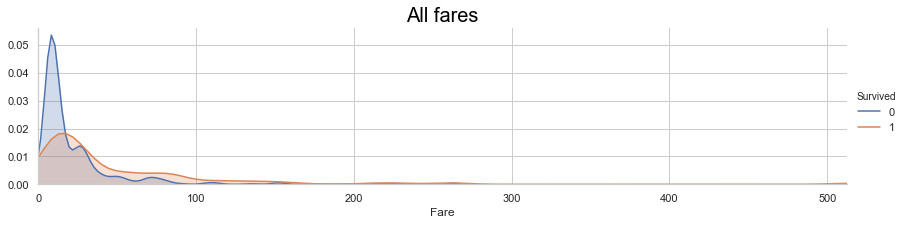

In [0]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train_data['Fare'].max()))
facet.add_legend()
plt.title('All fares', color = 'black', fontsize = 20);

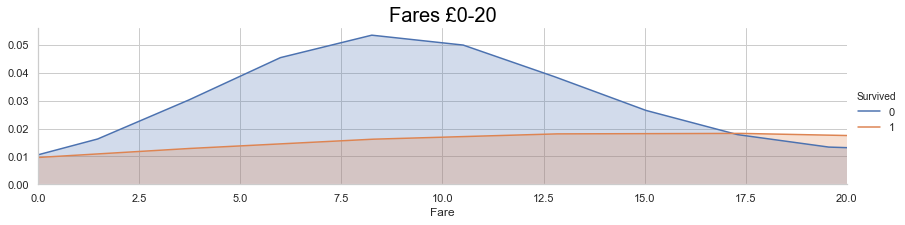

In [0]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train_data['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)
plt.title('Fares £0-20', color = 'black', fontsize = 20);

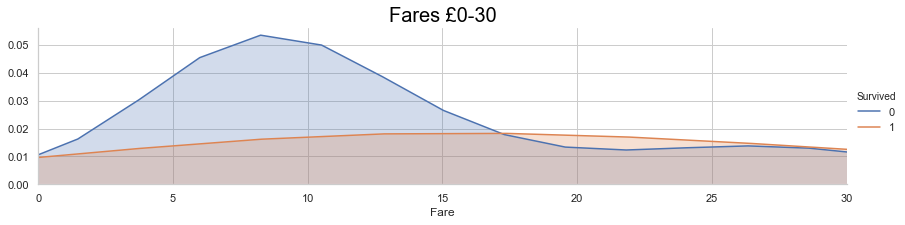

In [0]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train_data['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)
plt.title('Fares £0-30', color = 'black', fontsize = 20);

In [0]:
# Binning fares into four groups
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [0]:
# Check the fare categories appear
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_log
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0,1.981001
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,1,4.266662
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,2,2.070022
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,1,3.972177
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0,2.085672


### 4.6 Cabin

#### 4.6.1 Feature scaling for Cabin data

In [0]:
train_data.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
E101           3
              ..
B37            1
B80            1
A32            1
A24            1
B102           1
Name: Cabin, Length: 147, dtype: int64

In [0]:
# Extract first letter of Cabin which indicates deck
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

### Cutaway diagram

![Cutaway diagram](images/cutaway-diagram.png)

From the diagram we can see that Pclass would closely correspond to deck: first class had the top decks (A-E), second class (D-F), and third class (E-G). Passengers towards the top (higher decks, higher Pclass) were more likely to survive, because they were closer to the lifeboats.

Some passengers have multiple cabins listed, probably because they purchased multiple adjacent cabins (evens are next to each other; odds are next to each other) for themselves. They were all first class too.

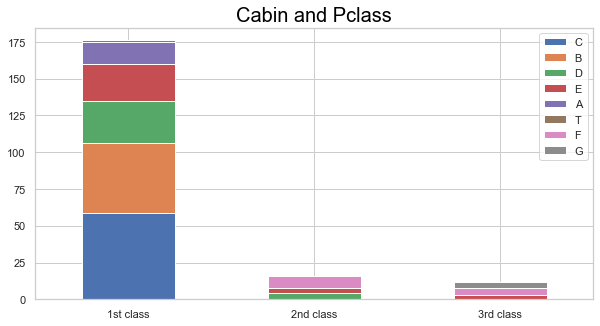

In [0]:
# Pclass closely corresponds to deck
Pclass1 = train_data[train_data['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train_data[train_data['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train_data[train_data['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))
plt.title('Cabin and Pclass', color = 'black', fontsize = 20)
plt.xticks(rotation=0);

In [0]:
# Feature scaling to map Cabin to a scale
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [0]:
# Replace missing Cabin with median fare for each Pclass
train_data["Cabin"].fillna(train_data.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test_data["Cabin"].fillna(test_data.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

### 4.7 FamilySize

We have seen that passengers travelling with Siblings/Spouse and Parents/Children are more likely to survive 

In [0]:
# Combining SibSp & Parch feature to create a new feature named FamilySize.
train_data["FamilySize"] = train_data["SibSp"] + train_data["Parch"] + 1
test_data["FamilySize"] = test_data["SibSp"] + test_data["Parch"] + 1

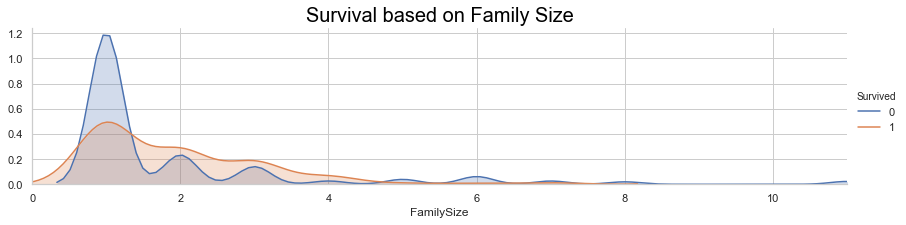

In [0]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train_data['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)
plt.title('Survival based on Family Size', color = 'black', fontsize = 20)
plt.xticks(rotation=0);

In [0]:
print (train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


The above data shows that:

- Having FamilySize up to 4 (from 2 to 4) gave a better chance of survival.
- FamilySize = 1, i.e. travelling alone has a lower chance of survival.
- Passengers with a large FamilySize (size of 5 and above) also have less chance of survival.

In [0]:
# Map FamilySize to a numeric value
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [0]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_log,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,1.981001,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,1,4.266662,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,2,2.070022,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,1,3.972177,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,2.085672,0.0


#### 4.7.1 IsAlone

This feature will be used to check chances of survival when travelling alone compared to travelling with family.

In [0]:
train_data['IsAlone'] = [1 if i<2 else 0 for i in train_data.FamilySize]
test_data['IsAlone'] = [1 if i<2 else 0 for i in test_data.FamilySize]

In [0]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Fare_log',
       'FamilySize', 'IsAlone'],
      dtype='object')

### Feature selection

We drop unnecessary columns/features to reduce noise and overfitting and keep only the most relevant ones in predicting the target response.

In [0]:
# Drop unnecessary features
features_drop = ['Ticket', 'SibSp', 'Parch', 'PassengerId']
train_data = train_data.drop(features_drop, axis=1)
test_data = test_data.drop(features_drop, axis=1)

In [0]:
train_data.drop('Fare_log', axis=1, inplace=True)

In [0]:
train_data.head(20)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1.0,0.0,2.0,0,0,0.4,1
1,1,1,1,3.0,2.0,0.8,1,1,0.4,1
2,1,3,1,1.0,0.0,2.0,0,2,0.0,1
3,1,1,1,2.0,2.0,0.8,0,1,0.4,1
4,0,3,0,2.0,0.0,2.0,0,0,0.0,1
5,0,3,0,2.0,0.0,2.0,2,0,0.0,1
6,0,1,0,3.0,2.0,1.6,0,0,0.0,1
7,0,3,0,0.0,1.0,2.0,0,3,1.6,1
8,1,3,1,2.0,0.0,2.0,0,1,0.8,1
9,1,2,1,0.0,2.0,1.8,1,1,0.4,1


### Correlation matrix

We will focus on features with strong positive or negative correlation with the Survived feature.

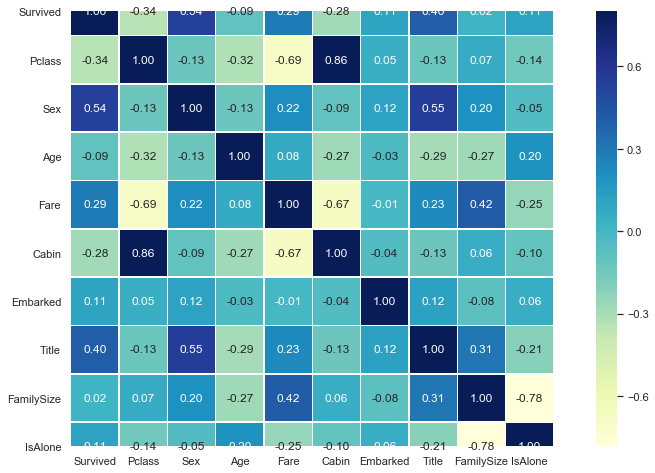

In [0]:
#The heatmap clearly shows the strength of correlation between pairs of variables
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), vmax=0.8, linewidths=0.5, fmt='.2f', square=True, annot=True, cmap='YlGnBu',linecolor="white");

Positive Correlation Features which may affect survival:

     - Sex and Survived: 0.54
     - Title and Survived: 0.40
     - Fare and Survived: 0.29
     - IsAlone and Survived: 0.11 - very low survival rates if alone - 
     - FamilySize and Survived: 0.02 - large FamilySize (of 5 and above) also have loweerchance of survival
     
Negative Correlation Features which may affect survival:

     - Pclass and Fare: -0.69 - This relationship can be explained by saying that first class passenger(1) paid higher 
     fare than second class passenger(2), similarly second class passenger paid more than the third class passenger(3).
     - Pclass and Survived: -0.34

### Pairplots

Pairplots to show distribution of data across features.

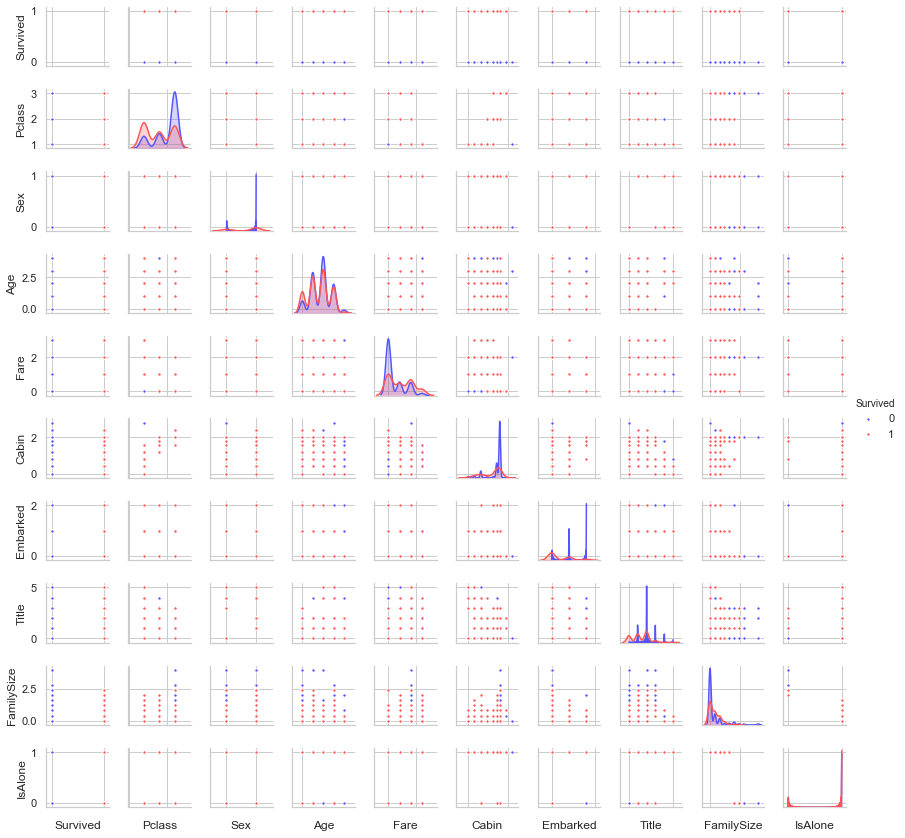

In [0]:
g = sns.pairplot(data=train_data, hue='Survived', palette = 'seismic',
                 size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[]);

## 5. Modelling

### Define training and testing set

In [0]:
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']
X_test = test_data.drop("Survived", axis=1).copy()
y_test = test_data['Survived']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((891, 9), (891,), (363, 9), (363,))

### Evaluate algorithms

We will use different classification models to produce a baseline accuracy for this problem. It is difficult to measure the quality of a given model without quantifying its performance on the training and test sets. 

### Choose test options and define a performance metric

We will use a 10-fold cross-validation method and the Accuracy Score as the performance metric for these classification models.

In [0]:
# 10-fold cross-validation and performance metric

seed = 9
folds = 10
metric = "accuracy"


### Normalise/scale the data

In [0]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Spot check a set of algorithms

In [0]:
# Hold different classification models in a single dictionary


models = {}
models["KNN"] = KNeighborsClassifier()
models["SVC"] = SVC()
models["DecisionTree"] = DecisionTreeClassifier()
models["CatBoost"] = CatBoostClassifier()
models["XGB"] = XGBClassifier()
models["RandomForest"] = RandomForestClassifier()
models["AdaBoost"] = AdaBoostClassifier()
models["GradientBoost"] = GradientBoostingClassifier()
models["ExtraTrees"] = ExtraTreesClassifier()
models["GaussianNB"] = GaussianNB()
models["LDA"] = LinearDiscriminantAnalysis()
models["QDA"] = QuadraticDiscriminantAnalysis()
models["LR"] = LogisticRegression()
models["MLP"] = MLPClassifier()



### Evaluate each model in turn

In [ ]:
model_results = []
model_names   = []
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, random_state=seed)
    results = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=metric)
    
    model_results.append(results)
    model_names.append(model_name)
    print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))

### Boxplot to compare classification models

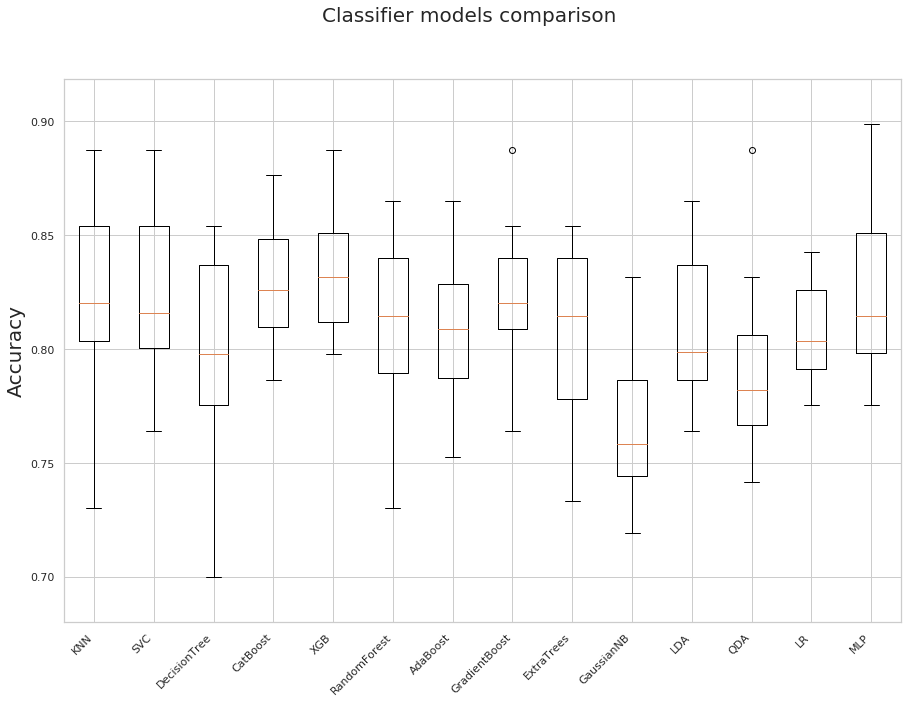

In [0]:
### Compare algorithms
figure = plt.figure(figsize=[15,10])
figure.suptitle('Classifier models comparison', fontsize=20)
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Accuracy", fontsize=20)
plt.margins(0.05, 0.1)

Scores as follows:
    
KNN: 0.822, 0.043<br>
SVC: 0.825, 0.037<br>
DecisionTree: 0.792, 0.049<br>
CatBoost: 0.828, 0.028<br>
XGB: 0.834, 0.028<br>
RandomForest: 0.81, 0.039<br>
AdaBoost: 0.809, 0.033<br>
GradientBoost: 0.823, 0.033<br>
ExtraTrees: 0.805, 0.042<br>
GaussianNB: 0.767, 0.032<br>
LDA: 0.808, 0.034<br>
QDA: 0.791, 0.042<br>
LR: 0.807, 0.024<br>
MLP: 0.824, 0.036


### Choose a model

Based on the above comparison, we can see that XGBoost Classifier model outperforms all the other classifier models. So, we will choose it as the best model for this problem.

### Create and train the model

In [0]:
# Create an XGBClassifier model
xgb = XGBClassifier(random_state=seed)

# Train the model using the training sets
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=9,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### Model evaluation

In [0]:
# Make predictions using the model
predictions = xgb.predict(X_test)


print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(precision_score(y_test,predictions))
print(recall_score(y_test,predictions))

0.7355371900826446
[[196  42]
 [ 54  71]]
0.6283185840707964
0.568


### Optimise the XGBoost classifier using Grid Search

The Grid Search technique exhaustively generates candidates from a grid of parameter values specified with the param_grid parameter, which is a dictionary with the values of the hyperparameters to evaluate. When fitting it on a dataset all the possible combinations of parameter values are evaluated and the best combination is retained.

In [0]:
xgb_param = {
    'n_estimators': [100,200,500,750,1000],
    'max_depth': [2,3,6],
    'min_child_weight': [1,3,5],
    'learning_rate': [0.05, 0.09, 0.1, 0.2]
}
scoring = {'AUC': 'roc_auc', 'Accuracy': 'accuracy_score'}
gs_xgb = GridSearchCV(estimator = XGBClassifier(), 
                       param_grid = xgb_param, 
                       scoring=metric, iid=False,
                       cv=k_fold, verbose = 1, 
                       refit='Accuracy')
gs_xgb.fit(X_train, y_train)
gs_xgb.best_params_

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:  7.3min finished


{'learning_rate': 0.09,
 'max_depth': 2,
 'min_child_weight': 3,
 'n_estimators': 100}

### Tune the hyperparameters

In [0]:
# Instantiate model with tuned hyperparameters
xgb = XGBClassifier(learning_rate=0.09, n_estimators=750,
                   max_depth= 2, min_child_weight= 1, 
                   colsample_bytree= 0.6, gamma= 0.0, 
                   reg_alpha= 0.001, subsample= 0.8
                  )
# Fit model to the training data
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.0,
              learning_rate=0.09, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=750, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.001, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [0]:
# Predict on the test data
predictions = xgb.predict(X_test)

print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(precision_score(y_test,predictions))
print(recall_score(y_test,predictions))

0.7520661157024794
[[202  36]
 [ 54  71]]
0.6635514018691588
0.568


The accuracy increased from __73.6% to 75.2%__

### A plot of survival vs predicted survival

In [0]:
pd.DataFrame({"Actual": y_test, "Predict": predictions}).head(10)

,Actual,Predict
0,0,0
1,1,0
2,0,0
3,0,0
4,1,1
5,1,0
6,0,0
7,1,0
8,1,1
9,0,0


### Feature importance for XGBoost classifier

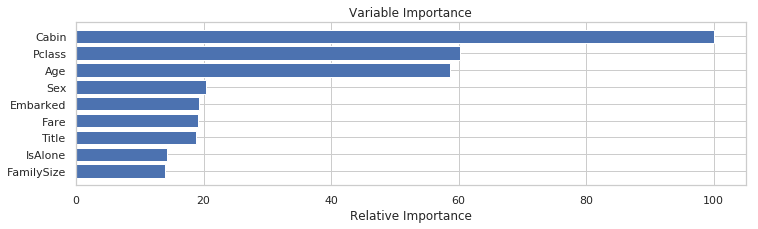

In [0]:
feature_importance = xgb.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(12, 3))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train_data.columns.difference(['Survived'])[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance');

The feature importance barchart for the XGBoost classifier confirms the link between Cabin and Pclass with passengers on the upper decks being more likely to survive, because they were closer to the lifeboats. Age would also have been significant as up to age 16 there was a high chance of survival, from mid-20s to mid-30s a high chance of dying, from late 40s to late 50s a higher chance of survival, and then a low chance of survival for elderly passengers. Other features such as sex were also significant with women having a greater chance of survival, and fare with those who paid more being more likely to survive.

### CatBoost classifier

In [ ]:
# Create a CatBoost model
catb = CatBoostClassifier()

# Train the model using the training sets
catb.fit(X_train, y_train)

In [0]:
# Predict on the test data
predictions = catb.predict(X_test)

print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(precision_score(y_test,predictions))
print(recall_score(y_test,predictions))

0.7465564738292011
[[192  46]
 [ 46  79]]
0.632
0.632


### Optimise the CatBoost classifier using Grid Search

In [ ]:
catb_param = {'depth':[2, 3, 4],
              'loss_function': ['Logloss', 'CrossEntropy'],
              'l2_leaf_reg':np.logspace(-20, -19, 3)
              }

gs_catb = GridSearchCV(catb, param_grid = catb_param, cv = k_fold, scoring = metric, n_jobs = -1, verbose = 1)

gs_catb.fit(X_train,y_train)

gs_catb.best_params_

### Tune the hyperparameters

In [0]:
# Create a Catboost model with tuned hyperparameters

catb = CatBoostClassifier(iterations=2500,
                                depth = 4,
                                l2_leaf_reg = 3.162277660168379e-20,
                                loss_function = 'Logloss',
                                eval_metric = 'Accuracy',
                                leaf_estimation_iterations = 10,
                                use_best_model=True
)

# Train the model 
catb.fit(X_train, y_train, logging_level='Silent',
            eval_set=(X_test, y_test))

In [0]:
# Predict on the test data
predictions = catb.predict(X_test)

print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(precision_score(y_test,predictions))
print(recall_score(y_test,predictions))

0.7520661157024794
[[193  45]
 [ 45  80]]
0.64
0.64


The accuracy increased from __74.7% to 75.2%__

### Feature importance for CatBoost classifier

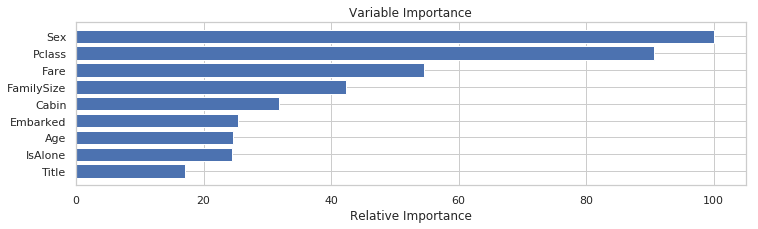

In [0]:
feature_importance = catb.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(12, 3))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train_data.columns.difference(['Survived'])[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance');

The feature importance barchart for the CatBoost classifier shows the most significant feature as being Sex, followed by Pclass. Fare is also important in addition to FamilySize.

### SVC classifier

In [0]:
# Create an SVC model
svcmod = SVC()

# Train the model using the training sets
svcmod.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
# Predict on the test data
predictions = svcmod.predict(X_test)

print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(precision_score(y_test,predictions))
print(recall_score(y_test,predictions))

0.7548209366391184
[[194  44]
 [ 45  80]]
0.6451612903225806
0.64


### Optimise the SVC classifier using Grid Search

In [0]:
SVM_param = [{
    'kernel':('linear', 'rbf'), 
    'C':(1,0.25,0.5,0.75),
    'gamma': (1,2,3,'auto'),
    'decision_function_shape':('ovo','ovr'),
    'shrinking':(True,False)}]

gs_SVM = GridSearchCV(svcmod,param_grid = SVM_param, cv=k_fold, scoring=metric, n_jobs= 2, verbose = 1)

gs_SVM.fit(X_train,y_train)

gs_SVM.best_params_

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 122 tasks      | elapsed:    3.5s
[Parallel(n_jobs=2)]: Done 1210 tasks      | elapsed:   18.4s
[Parallel(n_jobs=2)]: Done 1280 out of 1280 | elapsed:   19.4s finished


{'C': 1,
 'decision_function_shape': 'ovo',
 'gamma': 'auto',
 'kernel': 'rbf',
 'shrinking': True}

### Tune the hyperparameters

In [0]:
# Create SVC model with tuned hyperparameters
svcmod = SVC(C = 1, decision_function_shape = 'ovo', gamma = 'auto', kernel = 'rbf', shrinking = True)

# Train model 
svcmod.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
# Predict on the test data
predictions = svcmod.predict(X_test)

print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(precision_score(y_test,predictions))
print(recall_score(y_test,predictions))

0.7548209366391184
[[194  44]
 [ 45  80]]
0.6451612903225806
0.64


The accuracy remained the same at __75.5%__

### Gradient Boosting classifier

In [0]:
# Create a GradientBoosting model
gbc = GradientBoostingClassifier()

# Train the model using the training sets
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
# Make predictions using the model
predictions = gbc.predict(X_test)


print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(precision_score(y_test,predictions))
print(recall_score(y_test,predictions))

0.7327823691460055
[[191  47]
 [ 50  75]]
0.6147540983606558
0.6


### Optimise the Gradient Boosting classifier using Grid Search

In [0]:
GBC_param = [{
            'n_estimators' : np.arange(20,100,20),
            'learning_rate'       : [0.05, 0.1, 0.15],
            'max_features'        : np.arange(1,6),
            'max_depth'           : np.arange(1,4),
            'min_samples_split'   : np.arange(10,20,5),
            'min_samples_leaf'    : np.arange(3,21,7),
            'subsample'           : [0.3, 0.5, 0.7],
            'max_leaf_nodes'      : np.arange(5,20,5)}]

gs_GBC = GridSearchCV(gbc,param_grid = GBC_param, cv=k_fold, scoring=metric, n_jobs= 2, verbose = 1)

gs_GBC.fit(X_train,y_train)

gs_GBC.best_params_

### Tune the hyperparameters

In [0]:
# Create Gradient Boosting model with tuned hyperparameters
gbc = GradientBoostingClassifier(learning_rate = 0.15,
                                 max_depth = 2,
                                 max_features = 2,
                                 max_leaf_nodes = 15,
                                 min_samples_leaf = 10,
                                 min_samples_split = 10,
                                 n_estimators = 20,
                                 subsample = 0.7)

# Train model 
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=2,
                           max_features=2, max_leaf_nodes=15,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=10, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
# Make predictions using the model
predictions = gbc.predict(X_test)


print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(precision_score(y_test,predictions))
print(recall_score(y_test,predictions))

0.7658402203856749
[[199  39]
 [ 46  79]]
0.6694915254237288
0.632


The accuracy increased from __73.3% to 76.6%__

### Feature importance for Gradient Boosting classifier

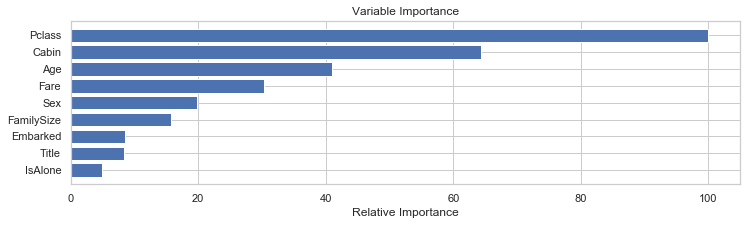

In [0]:
feature_importance = gbc.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(12, 3))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train_data.columns.difference(['Survived'])[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance');

The feature importance barchart shows Pclass as the most important feature followed by Cabin. Age is the third most important.

### k-Nearest Neighbors classifier

In [0]:
# Create a KNN model
knn = KNeighborsClassifier()

# Train the model using the training sets
knn.fit(X_train, y_train)

In [0]:
# Predict on the test data
predictions = knn.predict(X_test)

print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(precision_score(y_test,predictions))
print(recall_score(y_test,predictions))

### Optimise the KNN classifier using Grid Search

In [0]:
KNN_param = {'n_neighbors': [3,5,11,19],
             'weights': ['uniform','distance'],
             'metric':['euclidean', 'manhattan']
              }

gs_KNN = GridSearchCV(knn, param_grid = KNN_param, cv = k_fold, scoring = metric, n_jobs = -1, verbose = 1)

gs_KNN.fit(X_train,y_train)

gs_KNN.best_params_

### Tune the hyperparameters

In [0]:
# Create KNN model with tuned hyperparameters
knn = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 5, weights = 'uniform')

# Train model 
knn.fit(X_train, y_train)

In [0]:
# Predict on the test data
predictions = knn.predict(X_test)

print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(precision_score(y_test,predictions))
print(recall_score(y_test,predictions))

The accuracy remained the same at __73.8__%

### Neural Net Classifier

In [ ]:
# Create Neural Net model
model = Sequential()

# Add layers
model.add(Dense(9, input_dim = 9, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(5, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
# compile the Neural Net
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=32)

In [0]:
# Evaluate on the test data

score = model.evaluate(X_test, y_test)

print("\n{}: {:.2f}%".format(model.metrics_names[1],(score[1]*100)))

363/363 [==============================] - 0s 212us/step

acc: 74.93%


### Optimise MLP classifier using Grid Search

In [0]:
mlp_param = {'solver': ['lbfgs', 'adam'], 
             'max_iter': [200], 
             'alpha': 10.0 ** -np.arange(1, 10), 
             'hidden_layer_sizes':np.arange(10, 15), 
             'random_state':[0,1,2,3,4,5,6,7,8,9]}


gs_mlp = GridSearchCV(MLPClassifier(), param_grid = mlp_param, scoring = metric, cv = k_fold, n_jobs = -1, verbose = 1)

gs_mlp.fit(X_train,y_train)

gs_mlp.best_params_

Fitting 10 folds for each of 900 candidates, totalling 9000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 7196 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 8446 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 9000 out of 9000 | elapsed: 31.8min finished


{'alpha': 0.001,
 'hidden_layer_sizes': 12,
 'max_iter': 200,
 'random_state': 1,
 'solver': 'adam'}

### Tune the hyperparameters

In [ ]:
# Create MLP model with tuned hyperparameters

mlp = MLPClassifier(solver='adam', activation='relu',alpha=0.001,hidden_layer_sizes=(12), random_state=1,max_iter=200,verbose=1)


# Train model
mlp.fit(X_train,y_train)



In [0]:
# Predict on the test data

predictions = mlp.predict(X_test)

print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(precision_score(y_test,predictions))
print(recall_score(y_test,predictions))



0.7520661157024794
[[194  44]
 [ 46  79]]
0.6422764227642277
0.632


The accuracy increased from __74.9% to 75.2%__

## 6. Conclusion

The Gradient Boosting classifier achieved 76.6% accuracy and was the best performing model of those selected with Pclass as the most important feature followed by Cabin and Age. The SVC classifier achieved 75.5% accuracy as did the XGBoost classifier, after tuning, with Cabin, Pclass and Age being the most important features. The CatBoost classifier also achieved 75.2% accuracy with the most important feature being Sex and Pclass followed by Fare and FamilySize.  The MLP Neural Net classifier also scored 75.2% while k-Nearest Neighbours scored 73.8%. 


Passenger class, cabin and fare were indicative of socio-economic status, and age and sex also greatly influenced chances of surival. The code of conduct "Women and children first" was adhered to which meant that children had a greater likelihood of surviving, as did women, with those in 1st and 2nd class having an almost 100% chance of survival.